In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
#Choose absolute path here
folder_name = Path(r'C:\Users\Parth\Documents\540\android_review_crawler\ios\react')
file_name = 'main_info_new.csv'

#Change this to folder name
f_name = 'ios_native'

In [ ]:
combined_df = pd.DataFrame(columns = ['app_name', 'category', 'reviewer_ratings', 'review_body'])
all_app_df = pd.DataFrame(columns=combined_df.columns)
# Get all app names
app_name_category_df = pd.read_csv(os.path.join(folder_name, file_name))

# Skipping the main_info_new
csv_list = [f for f in os.listdir(folder_name) if f.startswith('reviews')]

for csv_name in csv_list:

#       Get app name from file name
    app_name = csv_name.split('reviews_')[1].split('.csv')[0]

#         Get the ratings and reviews columns
    df = pd.read_csv(os.path.join(folder_name, csv_name))[['reviewer_ratings', 'review_body']]
    print(df)
#         Needed for merge
    df ['key'] = 0

#         Get category and file name from main_info_new. Add no of reviews here. 
    app_category = (app_name_category_df.loc[app_name_category_df['app_name'] == app_name])[['app_name', 'category']]
    app_category['key'] = 0
#         Inner join on both
    combined_df = app_category.merge(df, how = 'inner', on = 'key')
    combined_df.drop('key', 1, inplace = True)
    all_app_df = pd.concat([all_app_df, combined_df])


In [ ]:

for index, row in all_app_df.iterrows():
#     if row['category'] in {'Communication', 'Photography', 'Medical', 'Music & Audio', 'Photography', 'Shopping', 'Tools', 'Travel & Local'}:
#         row['category'] = 'Utilities'
#     elif row['category'] in {'Education', 'Entertainment', 'Food & Drink', 'Health & Fitness', 'Lifestyle', 'Social', 'Sports'}:
#         row['category'] = 'Entertainment'
#     elif row['category'] in {'Business', 'Events', 'Finance', 'News & Magazines', 'Weather'}:
#         row['category'] = 'News'
#     elif row['category'] in {'Adventure','Board', 'Educational', 'Puzzle'}:
#         row['category'] = 'Games'
    if row['category'] in {'Photo & Video', 'Travel', 'Shopping', 'Music', 'Productivity'}:
        row['category'] = 'Utilities'
    elif row['category'] in {'Social Networking', 'Health & Fitness', 'Entertainment', 'Food & Drink', 'Lifestyle', 'Education'}:
        row['category'] = 'Entertainment'
    elif row['category'] in {'News', 'Weather', 'Finance', 'Business'}:
        row['category'] = 'News'
    #Update these values to whatever you need
#     if row['number_of_downloads'] in {'100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', '100000+', '100,000+'}:
#         row['number_of_downloads'] = '1'
#     elif row['number_of_downloads'] in {'500,000+', '5,000,000+', '1,000,000+'}:
#         row['number_of_downloads'] = '2'
#     elif row['number_of_downloads'] in {'10,000,000+', '50,000,000+', '100,000,000+'}:
#         row['number_of_downloads'] = '3'
#     elif row['number_of_downloads'] in {'500,000,000+','1,000,000,000+','5,000,000,000+'}:
#         row['number_of_downloads'] = '4'       

In [ ]:
#all_app_df.to_csv(f_name + '_combined.csv', index = False)

#print(all_app_df)

In [ ]:
#app_name_category_df['category'].value_counts()

In [ ]:
#app_name_category_df['number_of_downloads'].value_counts()

In [49]:
android_native_df = pd.read_csv(r'C:\Users\Parth\Documents\540\android_review_crawler\android\native\main_info_new.csv')[['category']]
android_react_df = pd.read_csv(r'C:\Users\Parth\Documents\540\android_review_crawler\android\react\main_info_new.csv')[['category']]
android_xamarin_df = pd.read_csv(r'C:\Users\Parth\Documents\540\android_review_crawler\android\xamarin\main_info_new.csv')[['category']]


In [55]:
android_hybrid_df = pd.concat([android_xamarin_df, android_react_df], axis=0)
android_combined_df = pd.concat([android_native_df, android_hybrid_df], axis=0)
android_combined_df.reset_index(drop=True, inplace=True)

android_mod_df = android_combined_df.copy(deep = True)
for index, row in android_mod_df.iterrows():
    if row['category'] in {'Communication', 'Photography', 'Medical', 'Music & Audio', 'Photography', 'Shopping', 'Tools', 'Travel & Local', 'Productivity', 'Art & Design', 'Video Players & Editors', 'House & Home' }:
        row['category'] = 'Utilities'
    elif row['category'] in {'Education', 'Entertainment', 'Food & Drink', 'Health & Fitness', 'Lifestyle', 'Social', 'Sports', 'Dating'}:
        row['category'] = 'Entertainment'
    elif row['category'] in {'Business', 'Events', 'Finance', 'News & Magazines', 'Weather'}:
        row['category'] = 'News'
    elif row['category'] in {'Adventure','Board', 'Educational', 'Puzzle', 'Racing', 'Arcade', 'Action', 'Card', 'Casino', 'Word', 'Casual'}:
        row['category'] = 'Games'

#print(android_combined_df)

In [56]:
#android_combined_df['category'].value_counts()

Food & Drink               21
Productivity               18
Lifestyle                  14
Business                   12
Tools                       9
Communication               7
Travel & Local              7
Shopping                    6
News & Magazines            5
Finance                     5
Photography                 5
Education                   5
Health & Fitness            4
Music & Audio               4
Medical                     4
Social                      3
Puzzle                      3
Entertainment               3
Adventure                   3
Arcade                      2
Art & Design                2
Card                        2
Casual                      2
Video Players & Editors     1
Weather                     1
Action                      1
Educational                 1
Word                        1
Events                      1
Board                       1
Racing                      1
Dating                      1
Casino                      1
Sports    

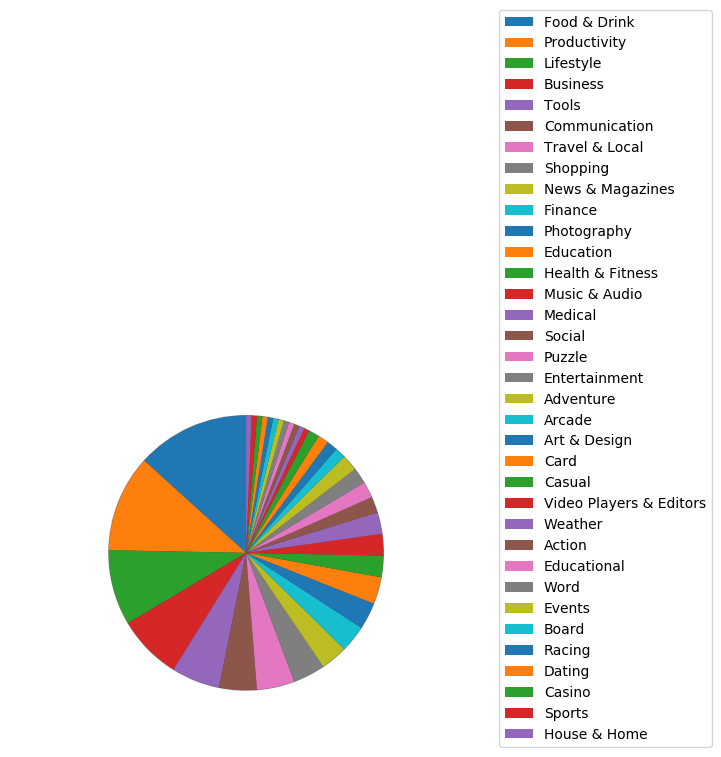

In [57]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor'] = 'white'
labels = android_combined_df['category'].value_counts().keys().tolist()

sizes = android_combined_df['category'].value_counts().tolist()

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, radius = 500, explode=None, labels=None, autopct=None,
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.patch.set_facecolor('black')
plt.legend(pie[0],labels, bbox_to_anchor=(1.3,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
#plt.show()

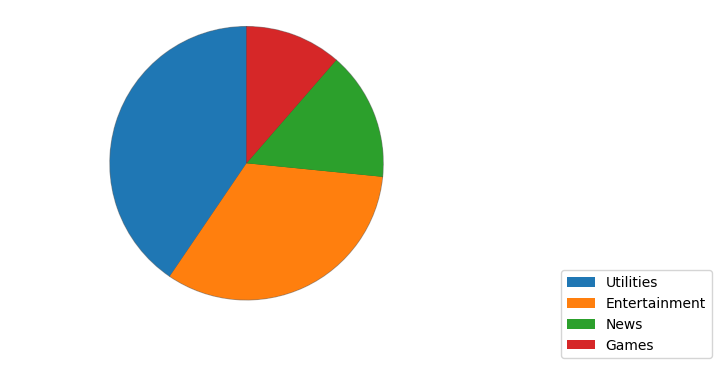

In [58]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor'] = 'white'
labels = android_mod_df['category'].value_counts().keys().tolist()

sizes = android_mod_df['category'].value_counts().tolist()

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, radius = 500, explode=None, labels=None, autopct=None,
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.patch.set_facecolor('black')
plt.legend(pie[0],labels, bbox_to_anchor=(1.3,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
#plt.show()

In [63]:
ios_native_df = pd.read_csv(r'C:\Users\Parth\Documents\540\android_review_crawler\ios\native\main_info_new.csv')[['category']]
ios_react_df = pd.read_csv(r'C:\Users\Parth\Documents\540\android_review_crawler\ios\react\main_info_new.csv')[['category']]


In [67]:
ios_combined_df = pd.concat([ios_native_df, ios_react_df], axis=0)
ios_combined_df.reset_index(drop=True, inplace=True)

ios_mod_df = ios_combined_df.copy(deep = True)
for index, row in ios_mod_df.iterrows():
    if row['category'] in {'Photo & Video', 'Travel', 'Shopping', 'Music', 'Productivity'}:
        row['category'] = 'Utilities'
    elif row['category'] in {'Social Networking', 'Health & Fitness', 'Entertainment', 'Food & Drink', 'Lifestyle', 'Education'}:
        row['category'] = 'Entertainment'
    elif row['category'] in {'News', 'Weather', 'Finance', 'Business'}:
        row['category'] = 'News'

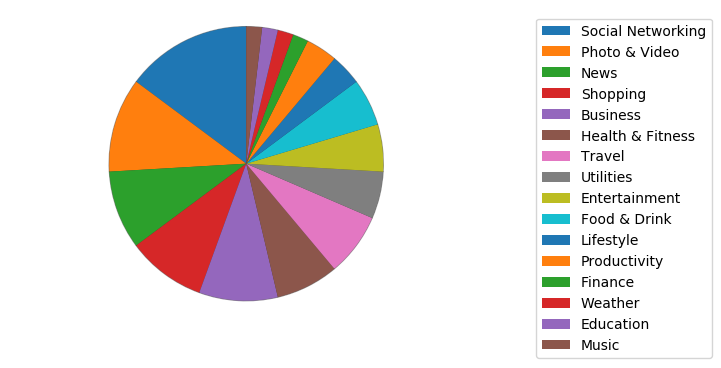

In [18]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor'] = 'white'
labels = ios_combined_df['category'].value_counts().keys().tolist()

sizes = ios_combined_df['category'].value_counts().tolist()

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, radius = 500, explode=None, labels=None, autopct=None,
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.patch.set_facecolor('black')
plt.legend(pie[0],labels, bbox_to_anchor=(1.3,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

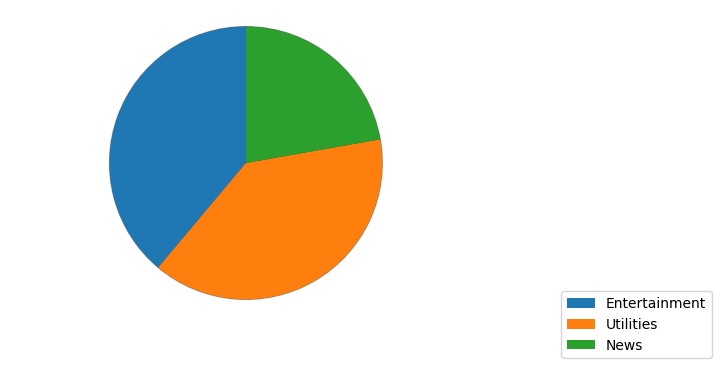

In [69]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor'] = 'white'
labels = ios_mod_df['category'].value_counts().keys().tolist()

sizes = ios_mod_df['category'].value_counts().tolist()

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, radius = 500, explode=None, labels=None, autopct=None,
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.patch.set_facecolor('black')
plt.legend(pie[0],labels, bbox_to_anchor=(1.3,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()